In [ ]:
import pandas as pd
df=pd.read_csv('lab4_data.csv')
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
#A1 claculating prior probability for each class
count_classes=df['buys_computer'].value_counts()
prob_yes=count_classes['yes']/len(df)
prob_no=count_classes['no']/len(df)
print("probability of yes for buys_computer is ",prob_yes)
print("probability of no for buys_computer is ", prob_no)

probability of yes for buys_computer is  0.6428571428571429
probability of no for buys_computer is  0.35714285714285715


In [ ]:
df.columns

Index(['age ', 'income', 'student', 'credit_rating', 'buys_computer'], dtype='object')

In [ ]:
df.dtypes


age              object
income           object
student          object
credit_rating    object
buys_computer    object
dtype: object

In [1]:
#A2
#A2
import pandas as pd
from scipy.stats import norm

# Define the dataset
data = [
    [30, 'high', 'no', 'fair', 'no'],
    [35, 'high', 'no', 'excellent', 'no'],
    [28, 'low', 'yes', 'excellent', 'yes'],
    [40, 'medium', 'no', 'fair', 'yes'],
    [25, 'medium', 'yes', 'excellent', 'yes'],
    [38, 'high', 'yes', 'fair', 'yes'],
    [20, 'low', 'yes', 'fair', 'yes'],
    [32, 'medium', 'no', 'excellent', 'yes'],
    [45, 'high', 'no', 'fair', 'no'],
    [22, 'medium', 'no', 'excellent', 'yes'],
    # Add the rest of your data here
]

# Define the column names
columns = ['age', 'income', 'student', 'credit_rating', 'buys_computer']

# Create a DataFrame from the dataset
df = pd.DataFrame(data, columns=columns)

# Display the loaded DataFrame
print("Loaded DataFrame:")
print(df)

# Define the class column
class_column = 'buys_computer'

# Define the features to calculate class conditional densities
feature_columns = ['age', 'income', 'student', 'credit_rating']

# Calculate class conditional densities
for feature in feature_columns:
    print(f"\nClass Conditional Densities for {feature}:")
    for class_label in df[class_column].unique():
        class_data = df[df[class_column] == class_label][feature]

        # For categorical features, calculate probability mass function (PMF)
        if df[feature].dtype == 'O':
            class_conditional_density = class_data.value_counts(normalize=True)
        # For continuous features, assume Gaussian distribution and use PDF
        else:
            mean = class_data.astype(float).mean()
            std_dev = class_data.astype(float).std()
            class_conditional_density = norm.pdf(df[feature], mean, std_dev)

        # Display the results
        print(f"Class: {class_label}")
        print(class_conditional_density)

Loaded DataFrame:
   age  income student credit_rating buys_computer
0   30    high      no          fair            no
1   35    high      no     excellent            no
2   28     low     yes     excellent           yes
3   40  medium      no          fair           yes
4   25  medium     yes     excellent           yes
5   38    high     yes          fair           yes
6   20     low     yes          fair           yes
7   32  medium      no     excellent           yes
8   45    high      no          fair            no
9   22  medium      no     excellent           yes

Class Conditional Densities for age:
Class: no
[0.03568668 0.05100483 0.02743777 0.0474887  0.01626578 0.0514439
 0.00482967 0.04333945 0.02880335 0.0082641 ]
Class: yes
[0.05146729 0.03929755 0.05097596 0.01972159 0.04430362 0.02732639
 0.02506624 0.04858877 0.0065052  0.0331055 ]

Class Conditional Densities for income:
Class: no
high    1.0
Name: income, dtype: float64
Class: yes
medium    0.571429
low       0.285

In [ ]:
#A3
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(index=df['age '],columns=[df['income'],df['student'],df['credit_rating'],df['buys_computer']])
chi2,p,dof,expected=chi2_contingency(contingency_table)
print("chi square value ", chi2)
print(" p value ", p)
print(" degrees of freedom are ", dof)
print("expected frequencies ", expected)
alpha=0.05
if(p<=alpha):
    print("features are dependent")
else:
    print("features are independent")

chi square value  25.200000000000003
 p value  0.3949583040945451
 degrees of freedom are  24
expected frequencies  [[0.28571429 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
  0.57142857 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
  0.28571429]
 [0.35714286 0.35714286 0.35714286 0.35714286 0.35714286 0.35714286
  0.71428571 0.35714286 0.35714286 0.35714286 0.35714286 0.35714286
  0.35714286]
 [0.35714286 0.35714286 0.35714286 0.35714286 0.35714286 0.35714286
  0.71428571 0.35714286 0.35714286 0.35714286 0.35714286 0.35714286
  0.35714286]]
features are independent


In [ ]:
#A4
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
feature=df[['age ','income','student','credit_rating']]
target=df['buys_computer']
label_encoder=preprocessing.LabelEncoder()
feature['age ']=label_encoder.fit_transform(feature['age '].astype(str))
feature['income']=label_encoder.fit_transform(feature['income'])
feature['student']=label_encoder.fit_transform(feature['student'])
feature['credit_rating']=label_encoder.fit_transform(feature['credit_rating'])
Train_x,Test_x,Train_y,Test_y=train_test_split(feature,target,test_size=0.2,random_state=50)
NB_model=GaussianNB()
NB_model.fit(Train_x,Train_y)
pred=NB_model.predict(Test_x)
print("accuracy obtained ", accuracy_score(Test_y,pred))
print("classification report", classification_report(Test_y,pred))
print(" confusion matrix ", confusion_matrix(Test_y,pred))

accuracy obtained  1.0
classification report               precision    recall  f1-score   support

         yes       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

 confusion matrix  [[3]]


C:\Users\madhu\AppData\Local\Temp\ipykernel_30768\2156509490.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['age ']=label_encoder.fit_transform(feature['age '].astype(str))
C:\Users\madhu\AppData\Local\Temp\ipykernel_30768\2156509490.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['income']=label_encoder.fit_transform(feature['income'])
C:\Users\madhu\AppData\Local\Temp\ipykernel_30768\2156509490.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
print(df.columns)

Index(['age ', 'income', 'student', 'credit_rating', 'buys_computer'], dtype='object')


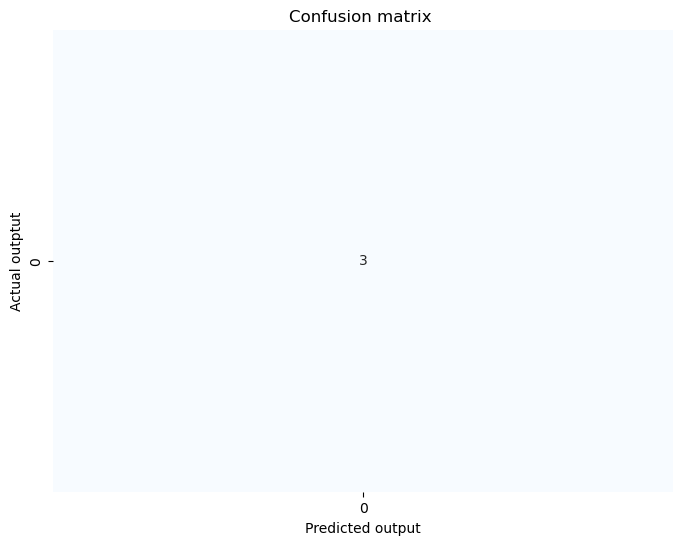

In [ ]:
Confusion_Matrix=confusion_matrix(Test_y,pred)
plt.figure(figsize=(8,6))
sns.heatmap(Confusion_Matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted output')
plt.ylabel('Actual outptut')
plt.title('Confusion matrix ')
plt.show()

In [ ]:
#A5
import pandas as pd
import numpy as np
DF=pd.read_csv('train_news.csv')
DF

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


accuracy obtained is  0.9
classification report                precision    recall  f1-score   support

           0       0.86      0.95      0.91      2087
           1       0.95      0.85      0.89      2073

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160

confusion matrix  [[1990   97]
 [ 319 1754]]


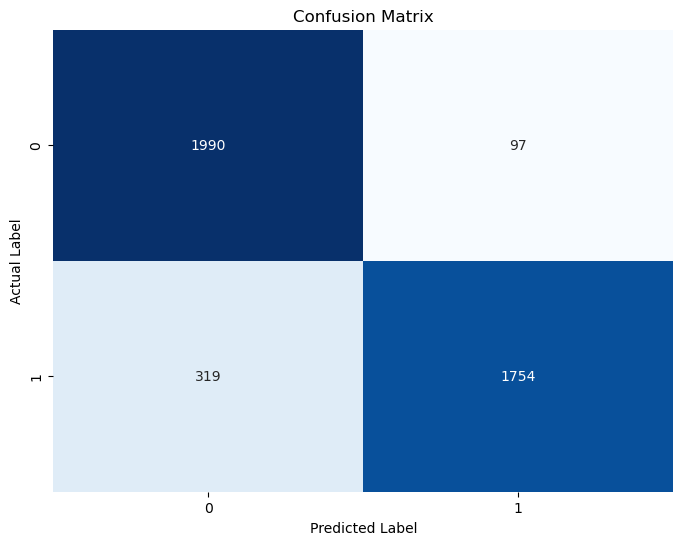

                                                    news  bin_pred
3835   Sesame Seeds for Knee Osteoarthritis VN:F [1.9...      fake
11835  10 \nWell folks, it looks like the chickens ha...      fake
6961   Good morning. (Want to get California Today by...  not fake
16112  Sustainable salt water battery won't corrode a...      fake
7185   by Yves Smith \nYves here. This Real News Netw...      fake
...                                                  ...       ...
11228  SAN FRANCISCO (AP)  —   Federal immigration of...  not fake
5076   A new report shows that only seven out of 10 o...      fake
9206   Home › POLITICS › DON’T LET DEBBIE WASSERMAN S...      fake
8454   Cancers of the colon and rectum have been decl...  not fake
4907   PHOENIX  —   Donald J. Trump won Arizona’s pre...  not fake

[4160 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
DF['news']=DF['news'].fillna('')
x=DF['news']
y=DF['label']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=50)
vectorize=CountVectorizer()
x_train_vect=vectorize.fit_transform(train_x)
x_test_vect=vectorize.transform(test_x)
classifier_NB=MultinomialNB()
classifier_NB.fit(x_train_vect,train_y)
y_pred=classifier_NB.predict(x_test_vect)
label_mapping={0:'not fake',1:'fake'}
y_pred_label=[label_mapping[label] for label in y_pred]
test_y_label=[label_mapping[label] for label in test_y]
accuracy=accuracy_score(test_y,y_pred)
clf_report=classification_report(test_y,y_pred)
Confusion_matrix=confusion_matrix(test_y,y_pred)
print("accuracy obtained is ",accuracy)
print("classification report ",clf_report)
print("confusion matrix ", Confusion_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(Confusion_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
df_output=pd.DataFrame({'news':test_x,'bin_pred':y_pred_label})
print(df_output)